In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c

from skimage import color

In [2]:
tf.__version__

'2.1.0-dev20191024'

In [3]:
def compare_model_label(model, l, ab):
    plt.figure(figsize=(10, 30))

    plt.subplot(1,3,1)
    plt.imshow(l[:,:,0], cmap=plt.cm.gray)

    plt.subplot(1,3,2)
    plt.imshow(join_l_ab(l, ab), cmap=plt.cm.binary)

    plt.subplot(1,3,3)
    output = model.predict(np.array([l], dtype=float))
    plt.imshow(join_l_ab(l, output), cmap=plt.cm.binary)

    plt.show()

# Training

In [4]:
from src.model.train_model import train_model

TensorBoard(log_dir='/output')
model = train_model()

train images size 8366, valid images size 464, batch_size 50
Train for 5 steps, validate for 5 steps
Epoch 1/30
5/5 [==============================] - 50s 10s/step - loss: 0.3412 - accuracy: 0.4910 - val_loss: 0.0264 - val_accuracy: 0.4537
Epoch 2/30
5/5 [==============================] - 50s 10s/step - loss: 0.0984 - accuracy: 0.5010 - val_loss: 0.0298 - val_accuracy: 0.5161
Epoch 3/30
5/5 [==============================] - 61s 12s/step - loss: 0.0542 - accuracy: 0.5044 - val_loss: 0.0254 - val_accuracy: 0.5423
Epoch 4/30
5/5 [==============================] - 56s 11s/step - loss: 0.0384 - accuracy: 0.5033 - val_loss: 0.0363 - val_accuracy: 0.5490
Epoch 5/30
5/5 [==============================] - 50s 10s/step - loss: 0.0313 - accuracy: 0.5115 - val_loss: 0.0270 - val_accuracy: 0.5401
Epoch 6/30
5/5 [==============================] - 50s 10s/step - loss: 0.0267 - accuracy: 0.5136 - val_loss: 0.0181 - val_accuracy: 0.5301
Epoch 7/30
5/5 [==============================] - 54s 11s/step - 

In [5]:
train_paths, _, test_paths = get_train_valid_test(c.DATASET_PATH)
test_data = create_tf_dataset(test_paths)

In [6]:
model.evaluate(test_data, steps=5)

5/5 [==============================] - 0s 56ms/step - loss: 0.0178 - accuracy: 0.4953


[0.01778840646147728, 0.4953064]

In [7]:
train_gen = image_generator(train_paths)
test_gen = image_generator(test_paths)

## Images from Train set

/usr/local/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 4 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


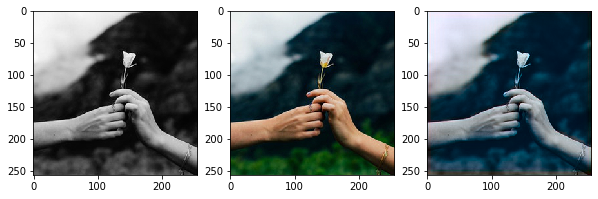

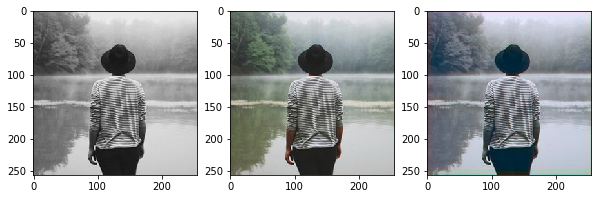

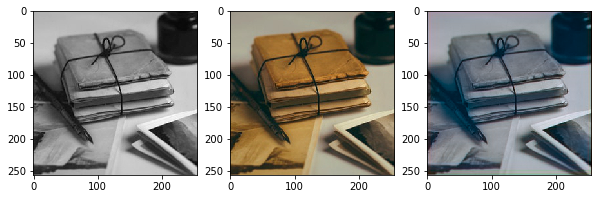

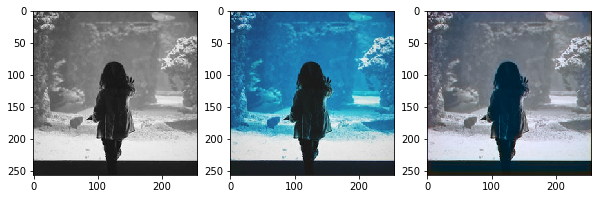

/usr/local/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 5 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


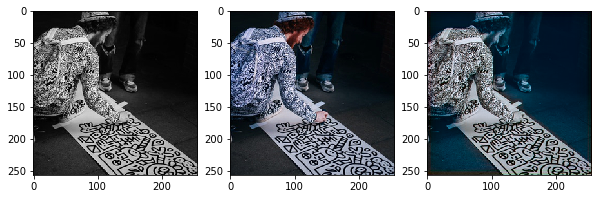

In [8]:
for i in range(5):
    l, ab = next(train_gen)
    compare_model_label(model, l, ab)

## Images from Test set

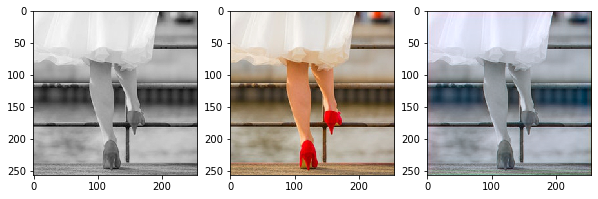

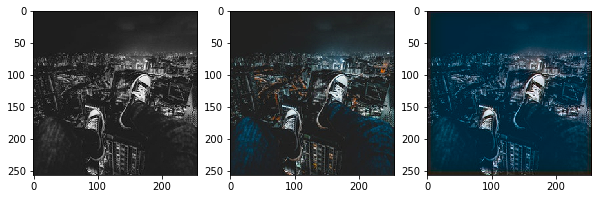

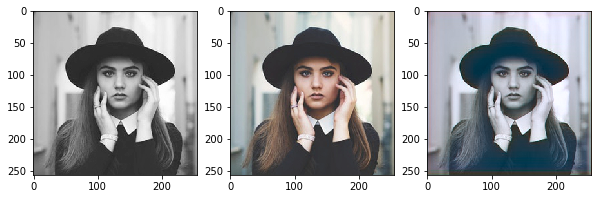

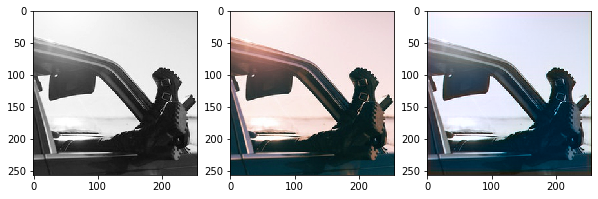

/usr/local/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 9 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


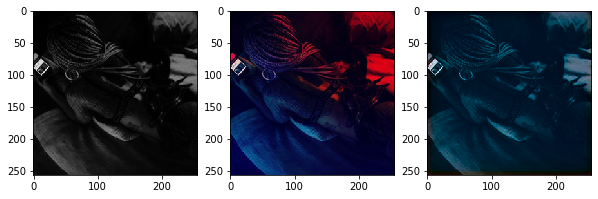

In [9]:
for i in range(5):
    l, ab = next(test_gen)
    compare_model_label(model, l, ab)